In [ ]:
!pip install numpy
!pip install librosa 
!pip install noisereduce
!pip install matplotlib

In [ ]:
import numpy as np
import librosa 
import librosa.display
import noisereduce as nr
import matplotlib.pyplot as plt
import os

In [ ]:
# Get git repo w data
!git clone https://github.com/Rishub-Handa/gia_noise.git

Cloning into 'gia_noise'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 114 (delta 2), reused 112 (delta 0), pack-reused 0
Receiving objects: 100% (114/114), 3.37 MiB | 8.26 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:

def extract_features(file_name):
    features = [] # 187 total features 
    
    audio_data, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(audio_data))
    
    mfcc = np.mean(librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40).T,axis=0)
    features.extend(mfcc) 
    
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    features.extend(chroma) 
    
    mel = np.mean(librosa.feature.melspectrogram(audio_data, sr=sample_rate).T,axis=0)
    features.extend(mel) 
    
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    features.extend(contrast) 

    return np.array(features)

In [ ]:

def load_data(): 

  features_total = []
  labels_total = []

  # For each emotion 
  for emotion in os.listdir('/content/gia_noise/data'): 

    # For each file in emotion 
    for filename in os.listdir('/content/gia_noise/data/' + emotion): 
      
      # Extract features 
      path = '/content/gia_noise/data/{}/{}'.format(emotion, filename)
      features = extract_features(path)

      # Save features and label 
      features_total.append(features)
      labels_total.append(emotion)

      print(path)

  return np.array(features_total), np.array(labels_total)


In [ ]:
def analyze_features(all_data, all_labels):
    #seeking only the numeric features from the data
    numeric_features = all_data.select_dtypes(include = [np.number])
    print(numeric_features.dtypes)
    corr = numeric_features.corr()
    print(corr)

In [ ]:
def plot_history(history = None):
    # Plots accuracy & loss versus epochs
    if not history:
        print("No history to plot")
        return
    fig = plt.figure(figsize=(10,8))
#     fig = plt.figure(figsize=(20,16))
    plt.plot(history.history['loss'], label="Loss")
    plt.plot(history.history['accuracy'], label="Accuracy")
    plt.axis([0,90,0,1.1])
    plt.title("Accuracy and Loss vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Percentage")
    plt.legend()
    plt.show()

In [ ]:
def plot_confusion_matrix(cm):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes,
           yticklabels=classes,
           title="Confusion Matrix",
           ylabel='True label',
           xlabel='Predicted label')
    ax.set_ylim(len(classes)-0.5, -0.5)
    ax.set_aspect('auto')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.grid(None)
    plt.show()

In [ ]:
features_total, labels_total = load_data()

print(features_total.shape)
print(labels_total.shape)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/friendly/05_04_Rithika_roomates_3.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/friendly/05_04_Rithika_roomates_6.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/friendly/05_04_Rithika_roomates_2.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/friendly/05_04_Rithika_roomates_5_NOISY.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/friendly/05_04_Rithika_roomates_4.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/friendly/05_04_Rithika_roomates_1.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/friendly/05_04_Rithika_roomates_7.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/friendly/05_04_Rithika_roomates_8.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/05_25_alert_in_car_4_6.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/05_25_alert_in_car_4_13.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/06_08_alert_in_car_7.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/06_08_alert_in_car_8.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/06_08_alert_in_car_12.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/05_25_alert_in_car_4_5.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/05_25_alert_in_car_4_10.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/06_08_alert_in_car_5.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/05_25_alert_in_car_4_12.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/05_25_alert_in_car_4_1.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/06_08_alert_in_car_13.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/05_25_alert_in_car_4_16.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/06_08_alert_in_car_1.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/06_08_alert_in_car_2.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/05_25_alert_in_car_4_3.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/06_08_alert_in_car_14.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/05_25_alert_in_car_3_2.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/05_25_alert_in_car_4_15.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/06_08_alert_in_car_10.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/06_08_alert_in_car_6.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/05_25_alert_in_car_3_3.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/06_08_alert_in_car_4.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/05_25_alert_in_car_4_11.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/06_08_alert_in_car_9.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/05_25_alert_in_car_4_2.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/05_25_alert_in_car_4_8.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/05_25_alert_in_car_4_9.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/05_25_alert_in_car_3_1.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/06_08_alert_in_car_3.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/06_08_alert_in_car_11.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/05_25_alert_in_car_4_7.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/05_25_alert_in_car_4_14.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/alert/05_25_alert_in_car_4_4.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_9_5.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_4_4.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_05_excited_1.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_05_excited_3.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_2_2.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_05_excited_2.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_6_6.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_3_7.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_8_2.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_05_excited_NOISE.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_8_4.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_7_2.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_4_6.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_8_7.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_8_3.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_9_4.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_7_1.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_7_4.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_8_6.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_8_5.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_9_1.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_6_1.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_6_5.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_4_2.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_05_excited_4.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_4_1.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_3_3.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_3_1.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_4_7.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_3_2.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_7_5.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_3_4.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_6_3.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_3_5.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_5_3.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_9_3.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_2_1.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_1_2.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_8_1.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_4_3.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_6_2.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_5_1.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_6_4.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_2_3.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_9_2.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_2_5.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_7_6.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_7_3.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_1_1.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_3_6.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_1_3.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_5_2.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_4_5.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/excited/05_25_Excited_2_4.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/anxious/anxious_in_car.m4a


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


/content/gia_noise/data/anxious/anxious_in_car_2.m4a
(97, 187)
(97,)


In [ ]:
print(features_total.shape)
classes = list(set(labels_total)) # classes = unique list of labels
n_classes = len(classes)
numeric_labels = np.array([classes.index(label) for label in labels_total]) # labels by index
print(classes)

(97, 187)
['excited', 'anxious', 'friendly', 'alert']


In [ ]:
import sklearn as sk
from sklearn import model_selection
from sklearn.metrics import confusion_matrix

import keras
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential, model_from_json
from keras.layers import Dense

test_size = 0.2
epochs    = 60
batch_size= 50
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)


In [ ]:
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(features_total, numeric_labels, test_size=test_size, shuffle=True)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(77, 187)
(77,)
(20, 187)
(20,)


In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu',  input_dim=x_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_classes, activation='softmax')) # sigmoid

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_test, y_test),
#                         shuffle=True,
                        verbose=2)

Epoch 1/60
2/2 - 14s - loss: 20.8091 - accuracy: 0.3247 - val_loss: 0.5792 - val_accuracy: 0.8500
Epoch 2/60
2/2 - 0s - loss: 1.2050 - accuracy: 0.6753 - val_loss: 0.0369 - val_accuracy: 1.0000
Epoch 3/60
2/2 - 0s - loss: 0.9275 - accuracy: 0.8571 - val_loss: 0.6463 - val_accuracy: 0.8500
Epoch 4/60
2/2 - 0s - loss: 1.0342 - accuracy: 0.8571 - val_loss: 0.0478 - val_accuracy: 1.0000
Epoch 5/60
2/2 - 0s - loss: 0.7134 - accuracy: 0.9740 - val_loss: 0.0676 - val_accuracy: 1.0000
Epoch 6/60
2/2 - 0s - loss: 0.8850 - accuracy: 0.8831 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 7/60
2/2 - 0s - loss: 0.7533 - accuracy: 0.9481 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 8/60
2/2 - 0s - loss: 0.6550 - accuracy: 0.9610 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 9/60
2/2 - 0s - loss: 0.6343 - accuracy: 0.9740 - val_loss: 0.0489 - val_accuracy: 1.0000
Epoch 10/60
2/2 - 0s - loss: 0.5844 - accuracy: 0.9740 - val_loss: 0.0202 - val_accuracy: 1.0000
Epoch 11/60
2/2 - 0s - loss: 0.4342 -

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               48128     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 260       
Total params: 89,540
Trainable params: 89,540
Non-trainable params: 0
_________________________________________________________________


In [ ]:
score_train = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score_train[1])
print("Training CE Loss: %.2f" % score_train[0])

score_test = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score_test[1])
print("Testing CE Loss: %.2f" % score_test[0])

Training Accuracy:  1.0
Training Cross Entropy: 0.00
Testing Accuracy:  1.0
Testing Cross Entropy: 0.00


In [ ]:
y_pred_percentages = model.predict(x_test) # predicted percentages

y_pred = np.argmax(y_pred_percentages, axis=1) # Most prevalent prediction

cm = confusion_matrix(y_test, y_pred)

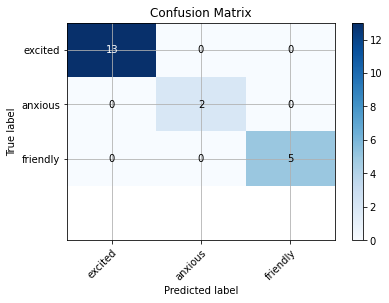

In [ ]:
plot_confusion_matrix(cm)

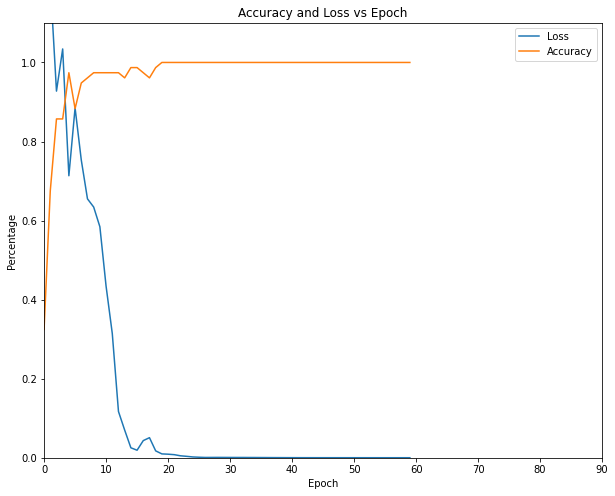

In [ ]:
plot_history(history)

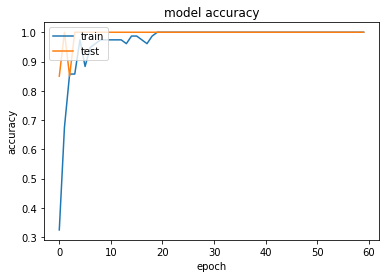

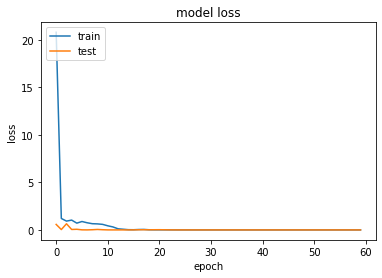

In [ ]:
# plot accuracy for train v test 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot loss for train v test 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()